In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [34]:
from google.colab import files
uploaded=files.upload()

Saving glass.csv to glass (1).csv


In [35]:
data=pd.read_csv("glass.csv")

In [36]:
data

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


#Visualization

# visualization of the distribution of a variable or the relationship between multiple variables separately within subsets of your dataset.

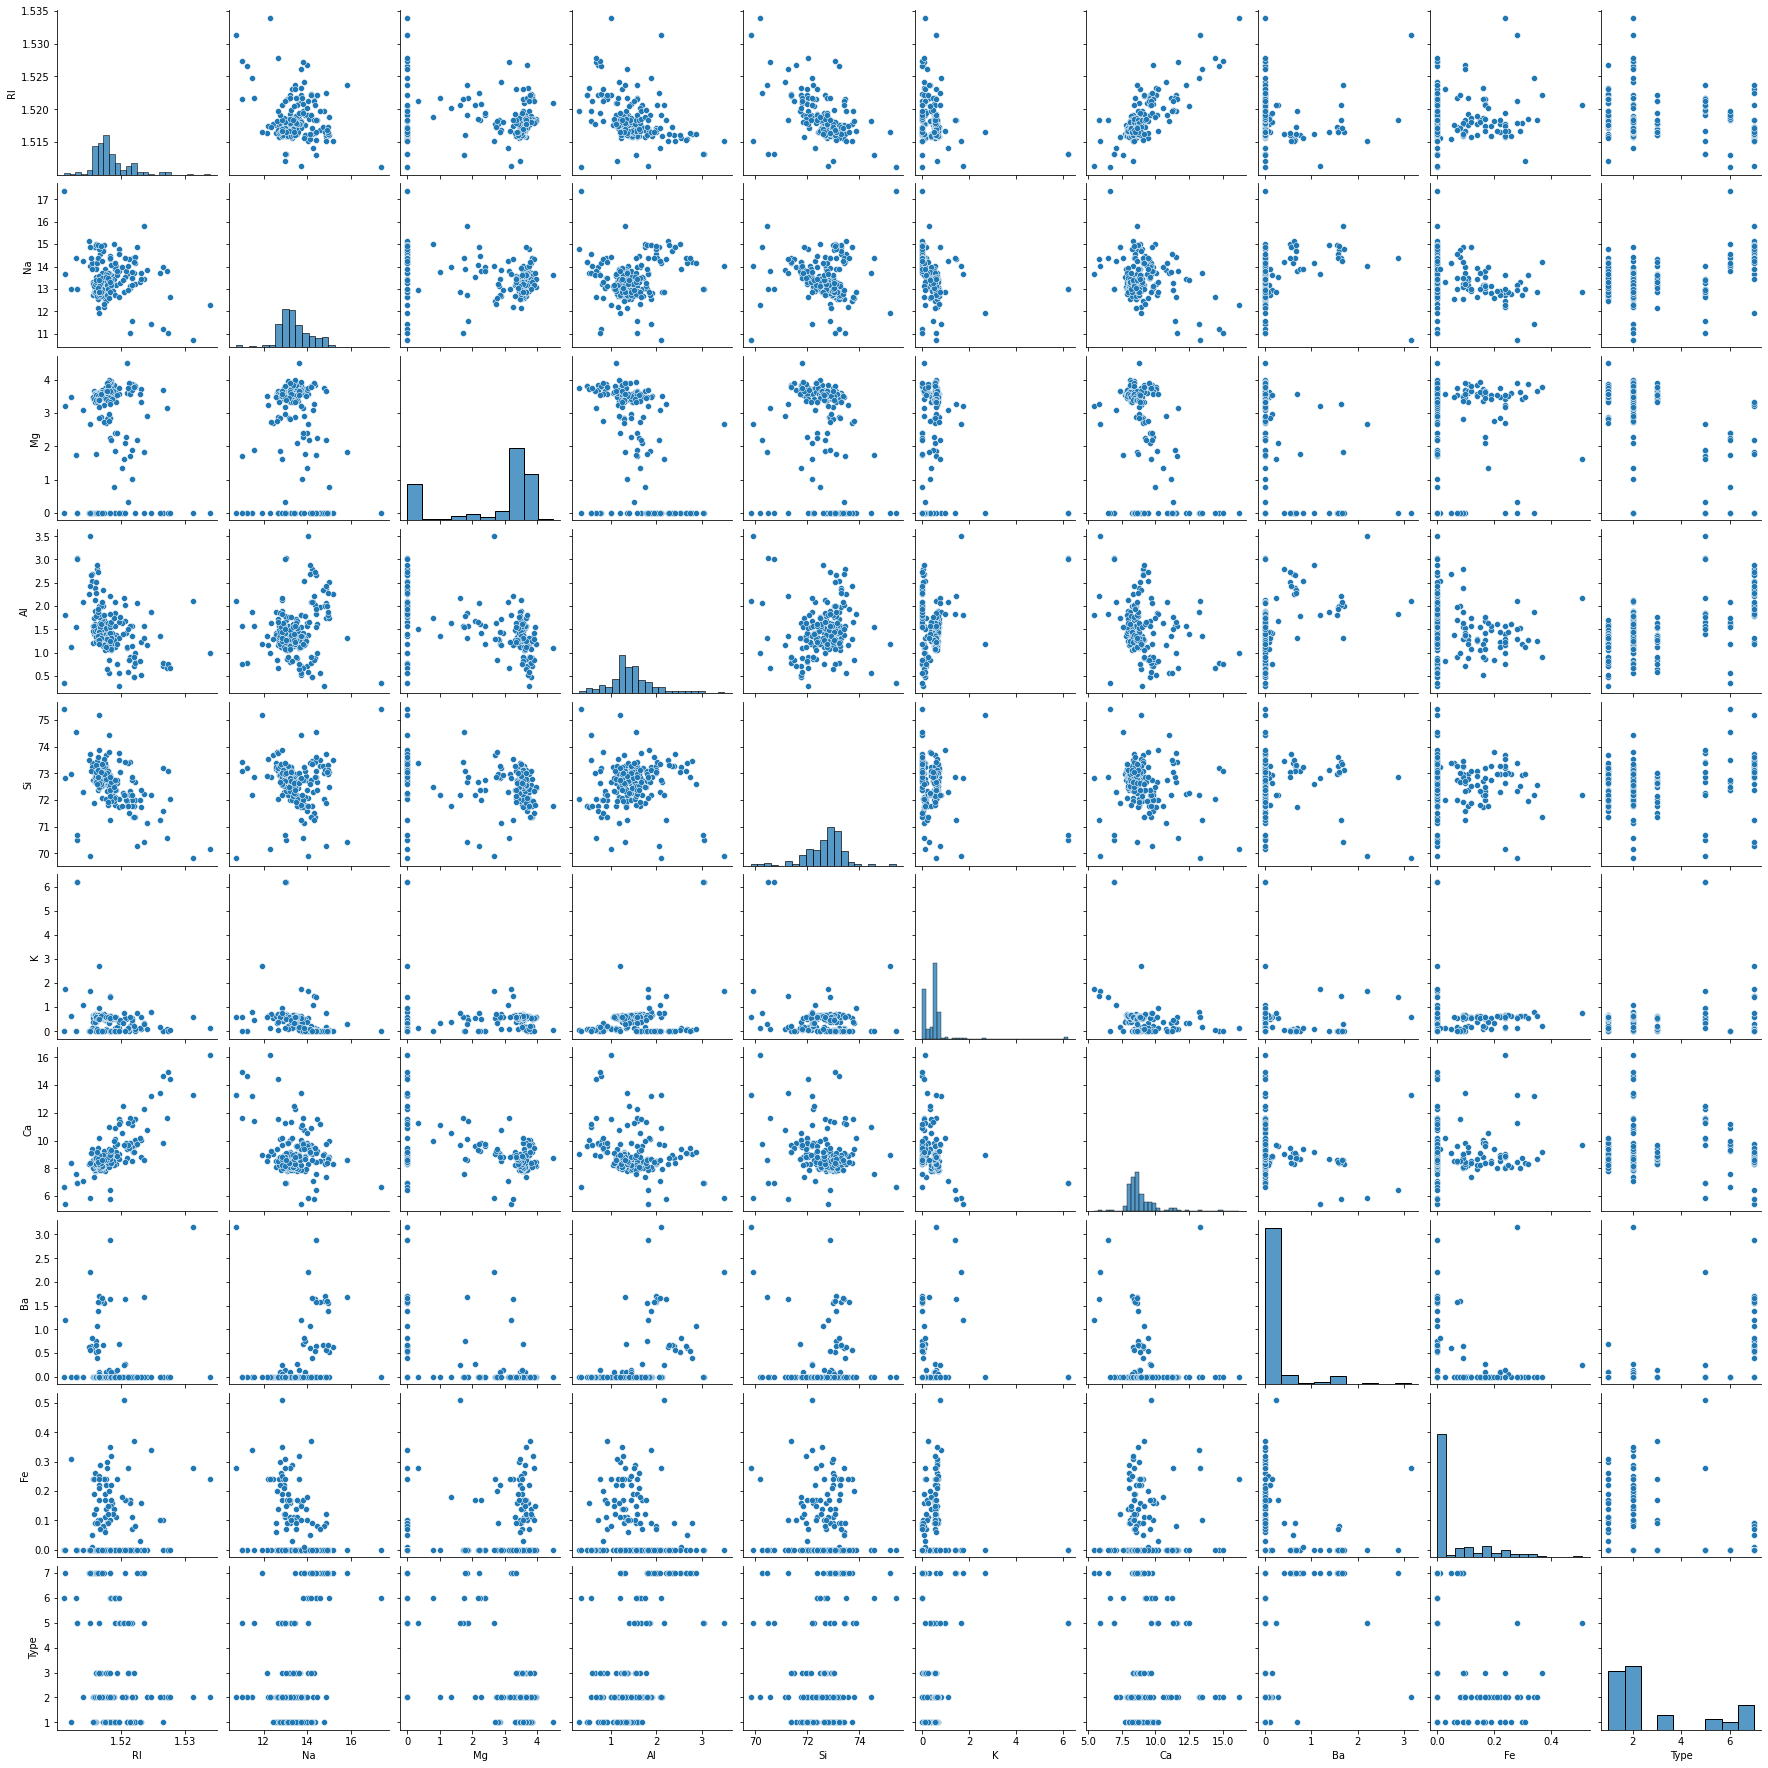

In [37]:
sns.pairplot(data)

In [38]:
data.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [39]:
data.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')

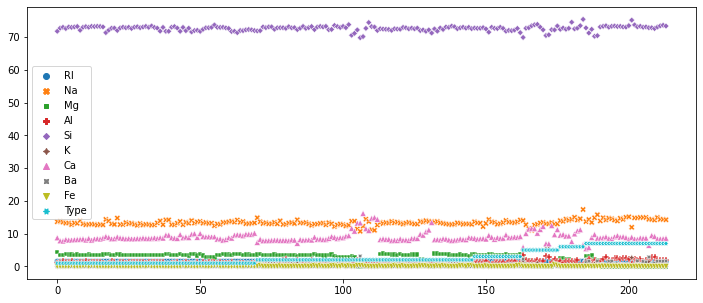

In [40]:
plt.figure(figsize=(12,5))
sns.scatterplot(data=data)

#Train Test split and scaling data

In [41]:
X= data.drop('Type',axis=1)
y= data.Type

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

In [43]:
scaler= StandardScaler()

In [44]:
scale_X_train= scaler.fit_transform(X_train)
scale_X_test= scaler.transform(X_test)

#Trying with K-FOLD

In [45]:
num_fold=10
kfold=KFold(n_splits=20)

In [46]:
model1= KNeighborsClassifier(n_neighbors=1)
results= cross_val_score(model1,scale_X_train,y_train,cv=kfold)

In [47]:
print(results.mean())

0.6866071428571429


In [48]:
model2= KNeighborsClassifier(n_neighbors=1)

In [49]:
model2.fit(scale_X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [50]:
y_pred= model2.predict(scale_X_test)

In [51]:
accuracy_score(y_test,y_pred)

0.7538461538461538

In [52]:
confusion_matrix(y_test,y_pred)

array([[18,  2,  1,  0,  0,  0],
       [ 7, 19,  0,  0,  0,  0],
       [ 3,  2,  2,  0,  0,  0],
       [ 0,  0,  0,  2,  0,  0],
       [ 0,  1,  0,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  7]])

In [53]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.64      0.86      0.73        21
           2       0.79      0.73      0.76        26
           3       0.67      0.29      0.40         7
           5       1.00      1.00      1.00         2
           6       1.00      0.50      0.67         2
           7       1.00      1.00      1.00         7

    accuracy                           0.75        65
   macro avg       0.85      0.73      0.76        65
weighted avg       0.77      0.75      0.74        65



#Hyperparameter Tuning using Grid search Cross Validation Technique

In [54]:
n_neighbors = np.array(range(1,40))
param_grid = dict(n_neighbors=n_neighbors)

In [55]:
model3= KNeighborsClassifier()
grid= GridSearchCV(model3,param_grid=param_grid)
grid.fit(scale_X_train,y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])})

In [56]:
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.6924137931034482
{'n_neighbors': 1}
KNeighborsClassifier(n_neighbors=1)


#Visualizing the Cross Validation Result

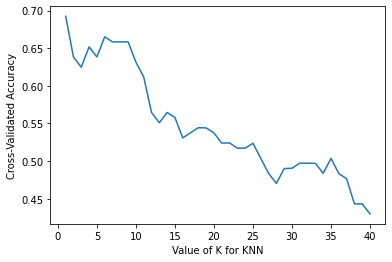

In [57]:
import matplotlib.pyplot as plt 
%matplotlib inline
# choose k between 1 to 41
k_range = range(1, 41)
k_scores = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn,scale_X_train, y_train, cv=5)
    k_scores.append(scores.mean())
# plot to see clearly
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

#Elbow Method for Choosing optimum K Values

In [58]:
test_error_rates = []


for k in range(1,30):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(scale_X_train,y_train) 
   
    y_pred_test = knn_model.predict(scale_X_test)
    
    test_error = 1 - accuracy_score(y_test,y_pred_test)
    test_error_rates.append(test_error)

Text(0.5, 0, 'K Value')

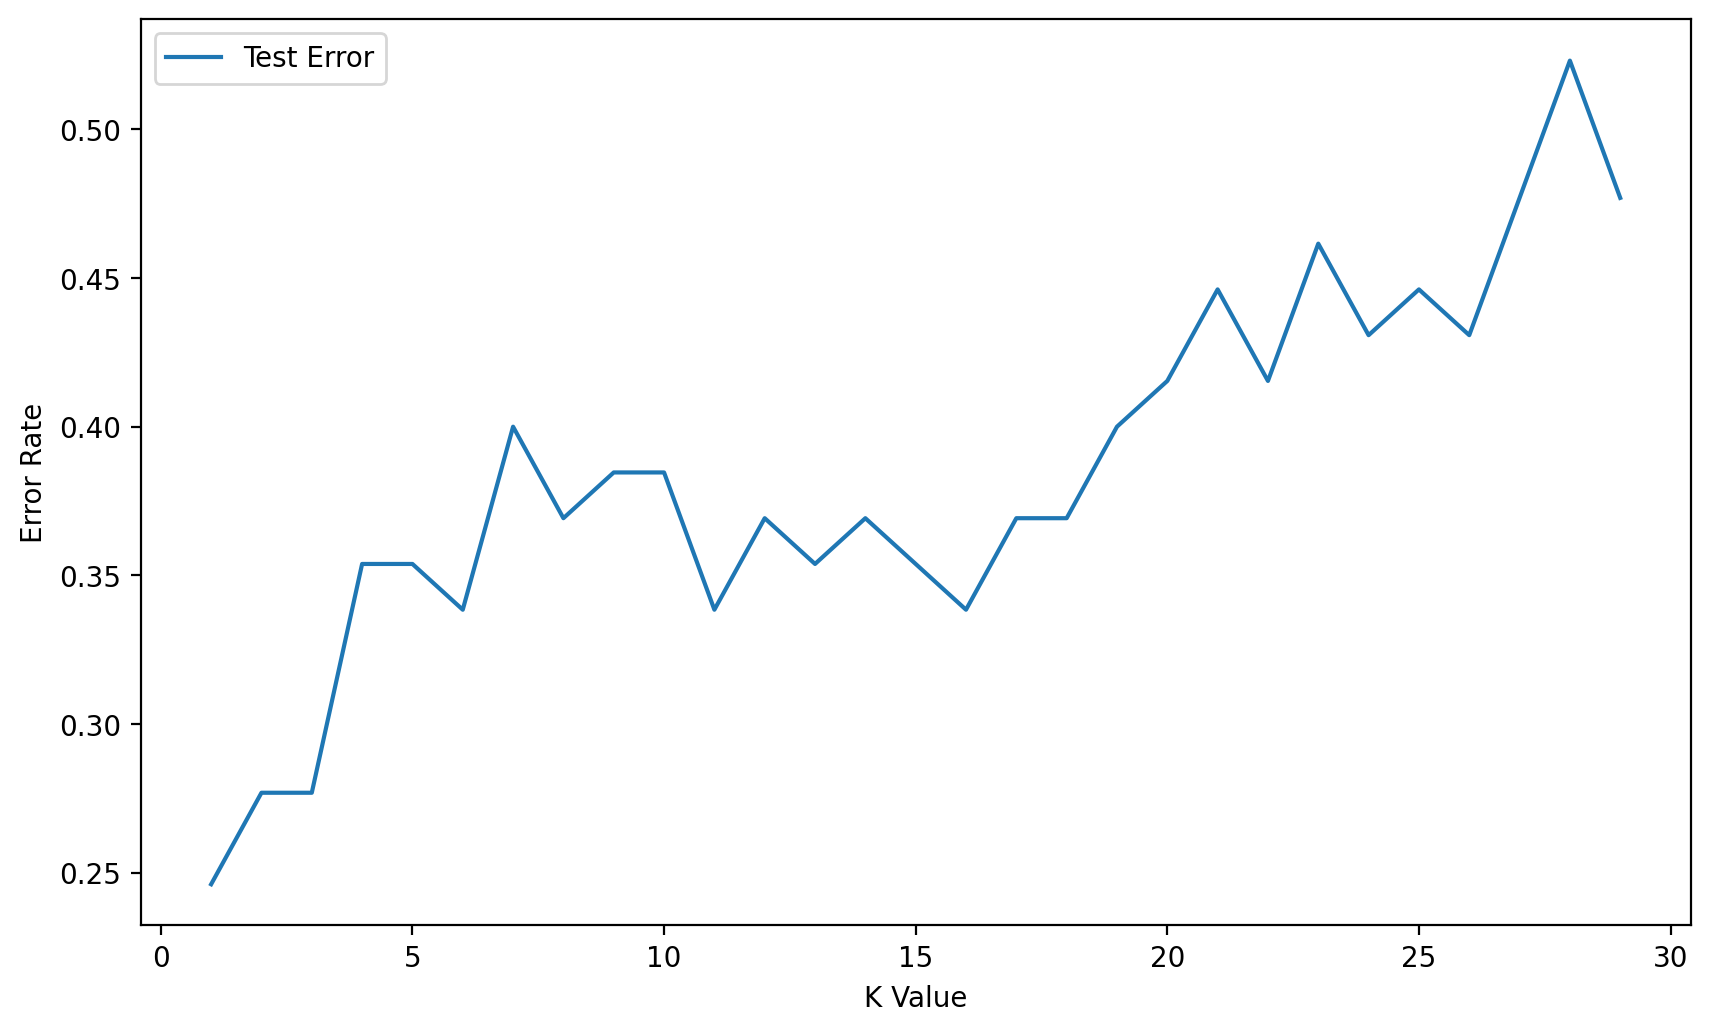

In [59]:
plt.figure(figsize=(10,6),dpi=200)
plt.plot(range(1,30),test_error_rates,label='Test Error')
plt.legend()
plt.ylabel('Error Rate')
plt.xlabel("K Value")

#Full Cross Validation Grid Search for K Value

In [60]:
scaler= StandardScaler()

In [32]:
knn= KNeighborsClassifier()

In [61]:
scaler= StandardScaler()

In [62]:
knn= KNeighborsClassifier()

In [63]:
knn.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [64]:

# Highly recommend string code matches variable name!
operations = [('scaler',scaler),('knn',knn)]

In [65]:
from sklearn.pipeline import Pipeline

In [66]:
pipe = Pipeline(operations)

In [67]:
k_values = list(range(1,20))

In [68]:
param_grid = {'knn__n_neighbors': k_values}

In [69]:
full_cv_classifier = GridSearchCV(pipe,param_grid,cv=5,scoring='accuracy')

In [71]:
# Use full X and y if you DON'T want a hold-out test set
# Use X_train and y_train if you DO want a holdout test set (X_test,y_test)
full_cv_classifier.fit(scale_X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19]},
             scoring='accuracy')

In [72]:
full_cv_classifier.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('knn', KNeighborsClassifier(n_neighbors=1))],
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsClassifier(n_neighbors=1),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 1,
 'knn__p': 2,
 'knn__weights': 'uniform'}

In [73]:
full_cv_classifier.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_knn__n_neighbors', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])

In [74]:
full_cv_classifier.cv_results_['mean_test_score']

array([0.68574713, 0.6583908 , 0.6383908 , 0.65172414, 0.63816092,
       0.66505747, 0.67149425, 0.6583908 , 0.66505747, 0.62482759,
       0.60505747, 0.57126437, 0.5645977 , 0.55793103, 0.55103448,
       0.53103448, 0.53770115, 0.53747126, 0.52390805])

#Final Model

In [75]:
scaler = StandardScaler()
knn1 = KNeighborsClassifier(n_neighbors=1)
operations = [('scaler',scaler),('knn1',knn1)]

In [76]:
pipe = Pipeline(operations)

In [77]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('knn1', KNeighborsClassifier(n_neighbors=1))])

In [78]:
pipe_pred= pipe.predict(X_test)

In [79]:
print(classification_report(y_test,pipe_pred))

              precision    recall  f1-score   support

           1       0.64      0.86      0.73        21
           2       0.79      0.73      0.76        26
           3       0.67      0.29      0.40         7
           5       1.00      1.00      1.00         2
           6       1.00      0.50      0.67         2
           7       1.00      1.00      1.00         7

    accuracy                           0.75        65
   macro avg       0.85      0.73      0.76        65
weighted avg       0.77      0.75      0.74        65

